In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import preprocessing, datasets, linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression,LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE


In [2]:
datos = pd.read_csv('datacontinuousstudentsL.csv')
datos = datos.iloc[:,1:]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 36 columns):
y      150 non-null float64
x1     150 non-null float64
x2     150 non-null float64
x8     150 non-null float64
x10    150 non-null float64
x11    150 non-null float64
x12    150 non-null float64
x27    150 non-null float64
x31    150 non-null float64
x32    150 non-null float64
x21    150 non-null float64
x22    150 non-null float64
x23    150 non-null float64
x24    150 non-null float64
x9     150 non-null int64
x25    150 non-null int64
x26    150 non-null int64
x30    150 non-null int64
x3     150 non-null int64
x4     150 non-null int64
x5     150 non-null int64
x6     150 non-null int64
x7     150 non-null int64
x13    150 non-null int64
x14    150 non-null int64
x15    150 non-null int64
x16    150 non-null int64
x17    150 non-null int64
x18    150 non-null int64
x19    150 non-null int64
x20    150 non-null int64
x28    150 non-null int64
x29    150 non-null int64
XC1    15

In [3]:
datos.head()

y      x1     x2        x8         x10       x11       x12  \
0 -0.852667  49.856  118.8  16.32096   18.762237  6.162105   9.39728   
1  0.685760  71.836   34.8  15.00535  119.946790  7.381654  10.42370   
2  5.951199  66.725   41.8  17.07023   10.879595  7.854230  12.97680   
3 -2.030599  41.696  132.0  16.31460    9.762927  7.545124  30.42790   
4 -6.143410  71.351   24.2  11.10790  151.581820  9.207040   0.00000   

        x27       x31       x32 ...   x16  x17  x18  x19  x20  x28  x29  XC1  \
0   24.7138  0.056546  0.112860 ...     1    0    0    0    0    0    0   x3   
1   38.0658  0.655260  0.886908 ...     0    0    0    0    0    0    0   x7   
2   48.3807  0.067855  0.133944 ...     0    1    0    0    0    0    1   x4   
3   59.8410  0.133230  0.260102 ...     0    1    0    0    0    0    0   x5   
4  175.9250  0.318584  0.627729 ...     0    0    0    1    0    0    0   x3   

   XC2  XC3  
0  x14  xc3  
1  xc2  xc3  
2  x17  x29  
3  x17  xc3  
4  x13  xc3  

[5 rows x 36 columns]

In [4]:
# Get column names first
names = datos.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
DatosC = datos.iloc[:,0:18].copy() 
DatosD =  datos.iloc[:,18:].copy() 

scaled_df = scaler.fit_transform(DatosC)
scaled_df = pd.DataFrame(scaled_df, columns=names[0:18])
#frames = [scaled_df, DatosD]

scaled_df = pd.concat([scaled_df, DatosD], axis=1, sort=False)

scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 36 columns):
y      150 non-null float64
x1     150 non-null float64
x2     150 non-null float64
x8     150 non-null float64
x10    150 non-null float64
x11    150 non-null float64
x12    150 non-null float64
x27    150 non-null float64
x31    150 non-null float64
x32    150 non-null float64
x21    150 non-null float64
x22    150 non-null float64
x23    150 non-null float64
x24    150 non-null float64
x9     150 non-null float64
x25    150 non-null float64
x26    150 non-null float64
x30    150 non-null float64
x3     150 non-null int64
x4     150 non-null int64
x5     150 non-null int64
x6     150 non-null int64
x7     150 non-null int64
x13    150 non-null int64
x14    150 non-null int64
x15    150 non-null int64
x16    150 non-null int64
x17    150 non-null int64
x18    150 non-null int64
x19    150 non-null int64
x20    150 non-null int64
x28    150 non-null int64
x29    150 non-null int64
X

In [5]:
x26 = scaled_df['x26'].values
x26

array([ 0.43034807, -1.6519813 ,  0.43034807, -1.6519813 ,  1.47151275,
        1.47151275, -2.69314598,  0.43034807, -1.6519813 , -2.69314598,
        0.43034807,  0.43034807, -0.61081661,  0.43034807,  0.43034807,
        0.43034807,  0.43034807,  0.43034807,  1.47151275,  0.43034807,
       -1.6519813 ,  1.47151275, -1.6519813 , -1.6519813 ,  0.43034807,
        0.43034807,  0.43034807, -0.61081661,  0.43034807,  0.43034807,
        0.43034807,  0.43034807,  0.43034807, -0.61081661, -0.61081661,
        0.43034807,  0.43034807,  0.43034807,  0.43034807,  0.43034807,
       -1.6519813 ,  0.43034807,  0.43034807, -1.6519813 ,  0.43034807,
        0.43034807,  1.47151275,  0.43034807,  0.43034807, -0.61081661,
        0.43034807, -0.61081661,  0.43034807,  0.43034807,  0.43034807,
        0.43034807,  0.43034807, -0.61081661,  0.43034807,  0.43034807,
       -1.6519813 , -1.6519813 ,  0.43034807,  0.43034807,  1.47151275,
        0.43034807,  0.43034807,  0.43034807,  0.43034807,  0.43

In [54]:
X = datos.drop(['y','XC1','XC2','XC3'], axis=1)
y = datos['y'].values
# prepare for modeling

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)


# Create the Scaler object scaler = StandardScaler()
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [40]:
# pandas for data loading, manipulation etc.
import pandas as pd


# numeric functions
import xgboost
import numpy as np
import collections
import math
import operator
from scipy import stats
from math import ceil

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# modelling
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,Lars,LassoLars,SGDRegressor
from sklearn.linear_model import RidgeCV, LassoCV,BayesianRidge #LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,train_test_split
from sklearn.metrics import make_scorer,r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor #,KNearestNeighborsRegressor


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, minmax_scale
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor

import warnings
#warnings.filterwarnings("ignore")

In [75]:
for i in range (len(X.columns[1:])):
    v=vif(np.matrix(X_train[1:]),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,29)))

Variance inflation factor for x1: 19.958724458362177
Variance inflation factor for x2: 15.213851761648819
Variance inflation factor for x8: 3.2481690954906064
Variance inflation factor for x10: 2.76246677957415
Variance inflation factor for x11: 6.963115733927674
Variance inflation factor for x12: 2.8942978364562086
Variance inflation factor for x27: 4.06616110320075
Variance inflation factor for x31: 25.211281282606
Variance inflation factor for x32: 24.540277762600592
Variance inflation factor for x21: 10.98386915840905
Variance inflation factor for x22: 1.3467656750157766
Variance inflation factor for x23: 8.821186227756096
Variance inflation factor for x24: 2.277596331542717
Variance inflation factor for x9: 1.883524691358778
Variance inflation factor for x25: 3.326588708373817
Variance inflation factor for x26: 3.497811842490201
Variance inflation factor for x30: 3.352423964261699
Variance inflation factor for x3: 3.889190222670588
Variance inflation factor for x4: 2.9037615342081

In [82]:
dataframe = pd.DataFrame.from_records(X_train) #estan bien los datos no los nombres
Columnas_b=['x8','x10', 'x11','x12','x27','x22','x23', 'x24', 'x9','x25', 'x26', 'x30', 'x3', 'x4', 'x5','x6', 'x7', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20','x28','x29']
#'x1', 'x2','x31', 'x32', 'x21',  
names=X.columns
#print X_train.names
names
len(Columnas)

32

In [84]:
idx_IN_columns = [0, 30]
extractedData = X_train[:,idx_IN_columns]
Columnas=['x1', 'x2', 'x8', 'x10', 'x11', 'x12', 'x27', 'x31', 'x32', 'x21',
          'x22', 'x23', 'x24', 'x9', 'x25', 'x26', 'x30', 'x3', 'x4', 'x5', 'x6',
          'x7', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x28','x29']

for i in range (len(Columnas)):
    dataframe.rename(columns={i:Columnas[i]}, inplace=True)
#dataframe
X_train_sort = dataframe[names].copy()
#X_train_sort

In [85]:
X3= X_train_sort.drop(['x1', 'x2','x31', 'x32', 'x21'], axis=1)

In [86]:
Pvalue=[]
for Var in np.arange(X3.shape[1]):
    y=y_train
    x=X3.iloc[:,[Var]]
    x=sm.add_constant(x)
    model=sm.OLS(y, x)
    results = model.fit()
    Pvalue=np.append(Pvalue, results.pvalues[1])
Result={'Nombre':X3.columns,'Pvalue':Pvalue}
df6=pd.DataFrame(Result)

df6.sort_values(by=['Pvalue'])

Nombre    Pvalue
6     x23  0.000444
26    x29  0.021099
9     x25  0.068084
7     x24  0.120986
4     x27  0.128277
1     x10  0.131593
16     x7  0.157690
22    x18  0.166351
10    x26  0.218145
17    x13  0.282925
5     x22  0.325044
12     x3  0.389122
21    x17  0.450922
2     x11  0.452453
19    x15  0.455646
20    x16  0.464484
13     x4  0.540409
11    x30  0.552682
3     x12  0.579044
8      x9  0.595268
24    x20  0.664726
25    x28  0.779301
18    x14  0.831633
23    x19  0.885658
0      x8  0.950700
15     x6  0.954976
14     x5  0.958882

In [89]:
##     Para la regresion modelo 10
import statsmodels.api as sm
# Create arrays for features and target variable

#columnas = ['x23','x25','x24', 'x29','x13','x1','x11','x32']

X10= X3[Columnas_b].copy()
y10 = y

model10 = sm.OLS(y10, sm.add_constant(X10)).fit()

print('coefficient of determination (R2):', model10.rsquared)
print('adjusted coefficient of determination (R2 Ajustado):', model10.rsquared_adj)
print('regression coefficients 10:', model10.params)
print(model10.summary())
print('Valores p_values 10',model10.pvalues )

coefficient of determination (R2): 0.33807921243812566
adjusted coefficient of determination (R2 Ajustado): 0.10597711809824761
regression coefficients 10: const    0.438893
x8      -0.019053
x10      0.302509
x11     -0.005605
x12     -0.149173
x27      0.398100
x22     -0.186548
x23      0.964838
x24     -0.105333
x9      -0.138500
x25      0.380558
x26      0.186052
x30     -0.018798
x3      -0.194751
x4       0.196925
x5       0.190411
x6       0.764083
x7       0.048182
x13     -0.256108
x14      0.057548
x15      0.149801
x16     -0.504297
x17     -0.739473
x18     -0.560958
x19     -0.417691
x20      0.337888
x28     -0.043481
x29      0.297554
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1.457
Date:    

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_ts, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y1_ts, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_ts, predictions)))

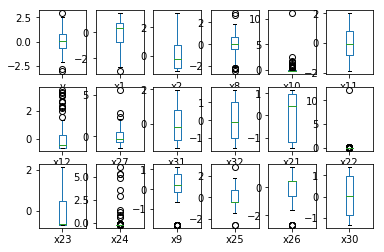

In [52]:
DatosC_sc = scaler.fit_transform(DatosC)
DatosC_sc = pd.DataFrame(DatosC_sc, columns=names[0:18])
DatosC_sc.plot(kind='box', subplots=True, layout=(3,6), sharex=False, sharey=False)
plt.show()

In [9]:
datos.head()

y      x1     x2        x8         x10       x11       x12  \
0 -0.852667  49.856  118.8  16.32096   18.762237  6.162105   9.39728   
1  0.685760  71.836   34.8  15.00535  119.946790  7.381654  10.42370   
2  5.951199  66.725   41.8  17.07023   10.879595  7.854230  12.97680   
3 -2.030599  41.696  132.0  16.31460    9.762927  7.545124  30.42790   
4 -6.143410  71.351   24.2  11.10790  151.581820  9.207040   0.00000   

        x27       x31       x32 ...   x16  x17  x18  x19  x20  x28  x29  XC1  \
0   24.7138  0.056546  0.112860 ...     1    0    0    0    0    0    0   x3   
1   38.0658  0.655260  0.886908 ...     0    0    0    0    0    0    0   x7   
2   48.3807  0.067855  0.133944 ...     0    1    0    0    0    0    1   x4   
3   59.8410  0.133230  0.260102 ...     0    1    0    0    0    0    0   x5   
4  175.9250  0.318584  0.627729 ...     0    0    0    1    0    0    0   x3   

   XC2  XC3  
0  x14  xc3  
1  xc2  xc3  
2  x17  x29  
3  x17  xc3  
4  x13  xc3  

[5 rows x 36 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF4CB74630>,
      dtype=object)

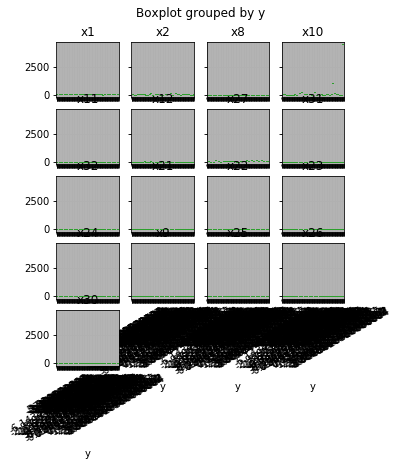

In [10]:
datos.boxplot(['x1','x2','x8','x10','x11','x12','x27','x31','x32','x21','x22','x23','x24','x9','x25','x26','x30'],'y',rot = 30,figsize=(5,6))

<IPython.core.display.Javascript object>


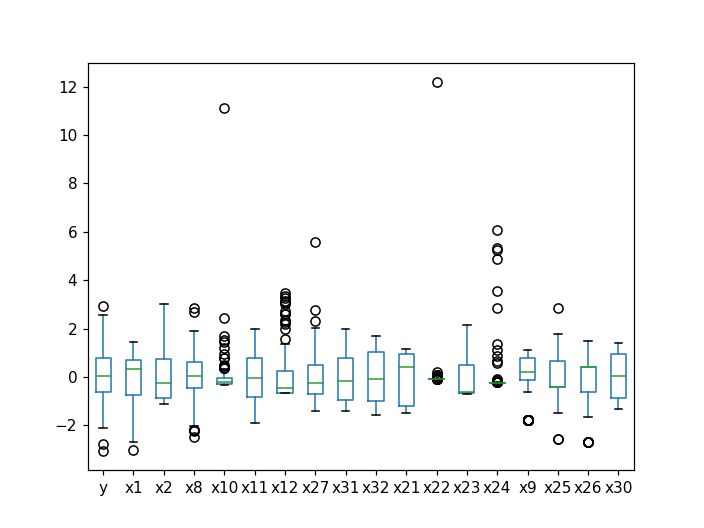

In [20]:
%matplotlib notebook
descriptive=scaled_df.describe()
DatosC_sc.plot(kind='box')

<IPython.core.display.Javascript object>


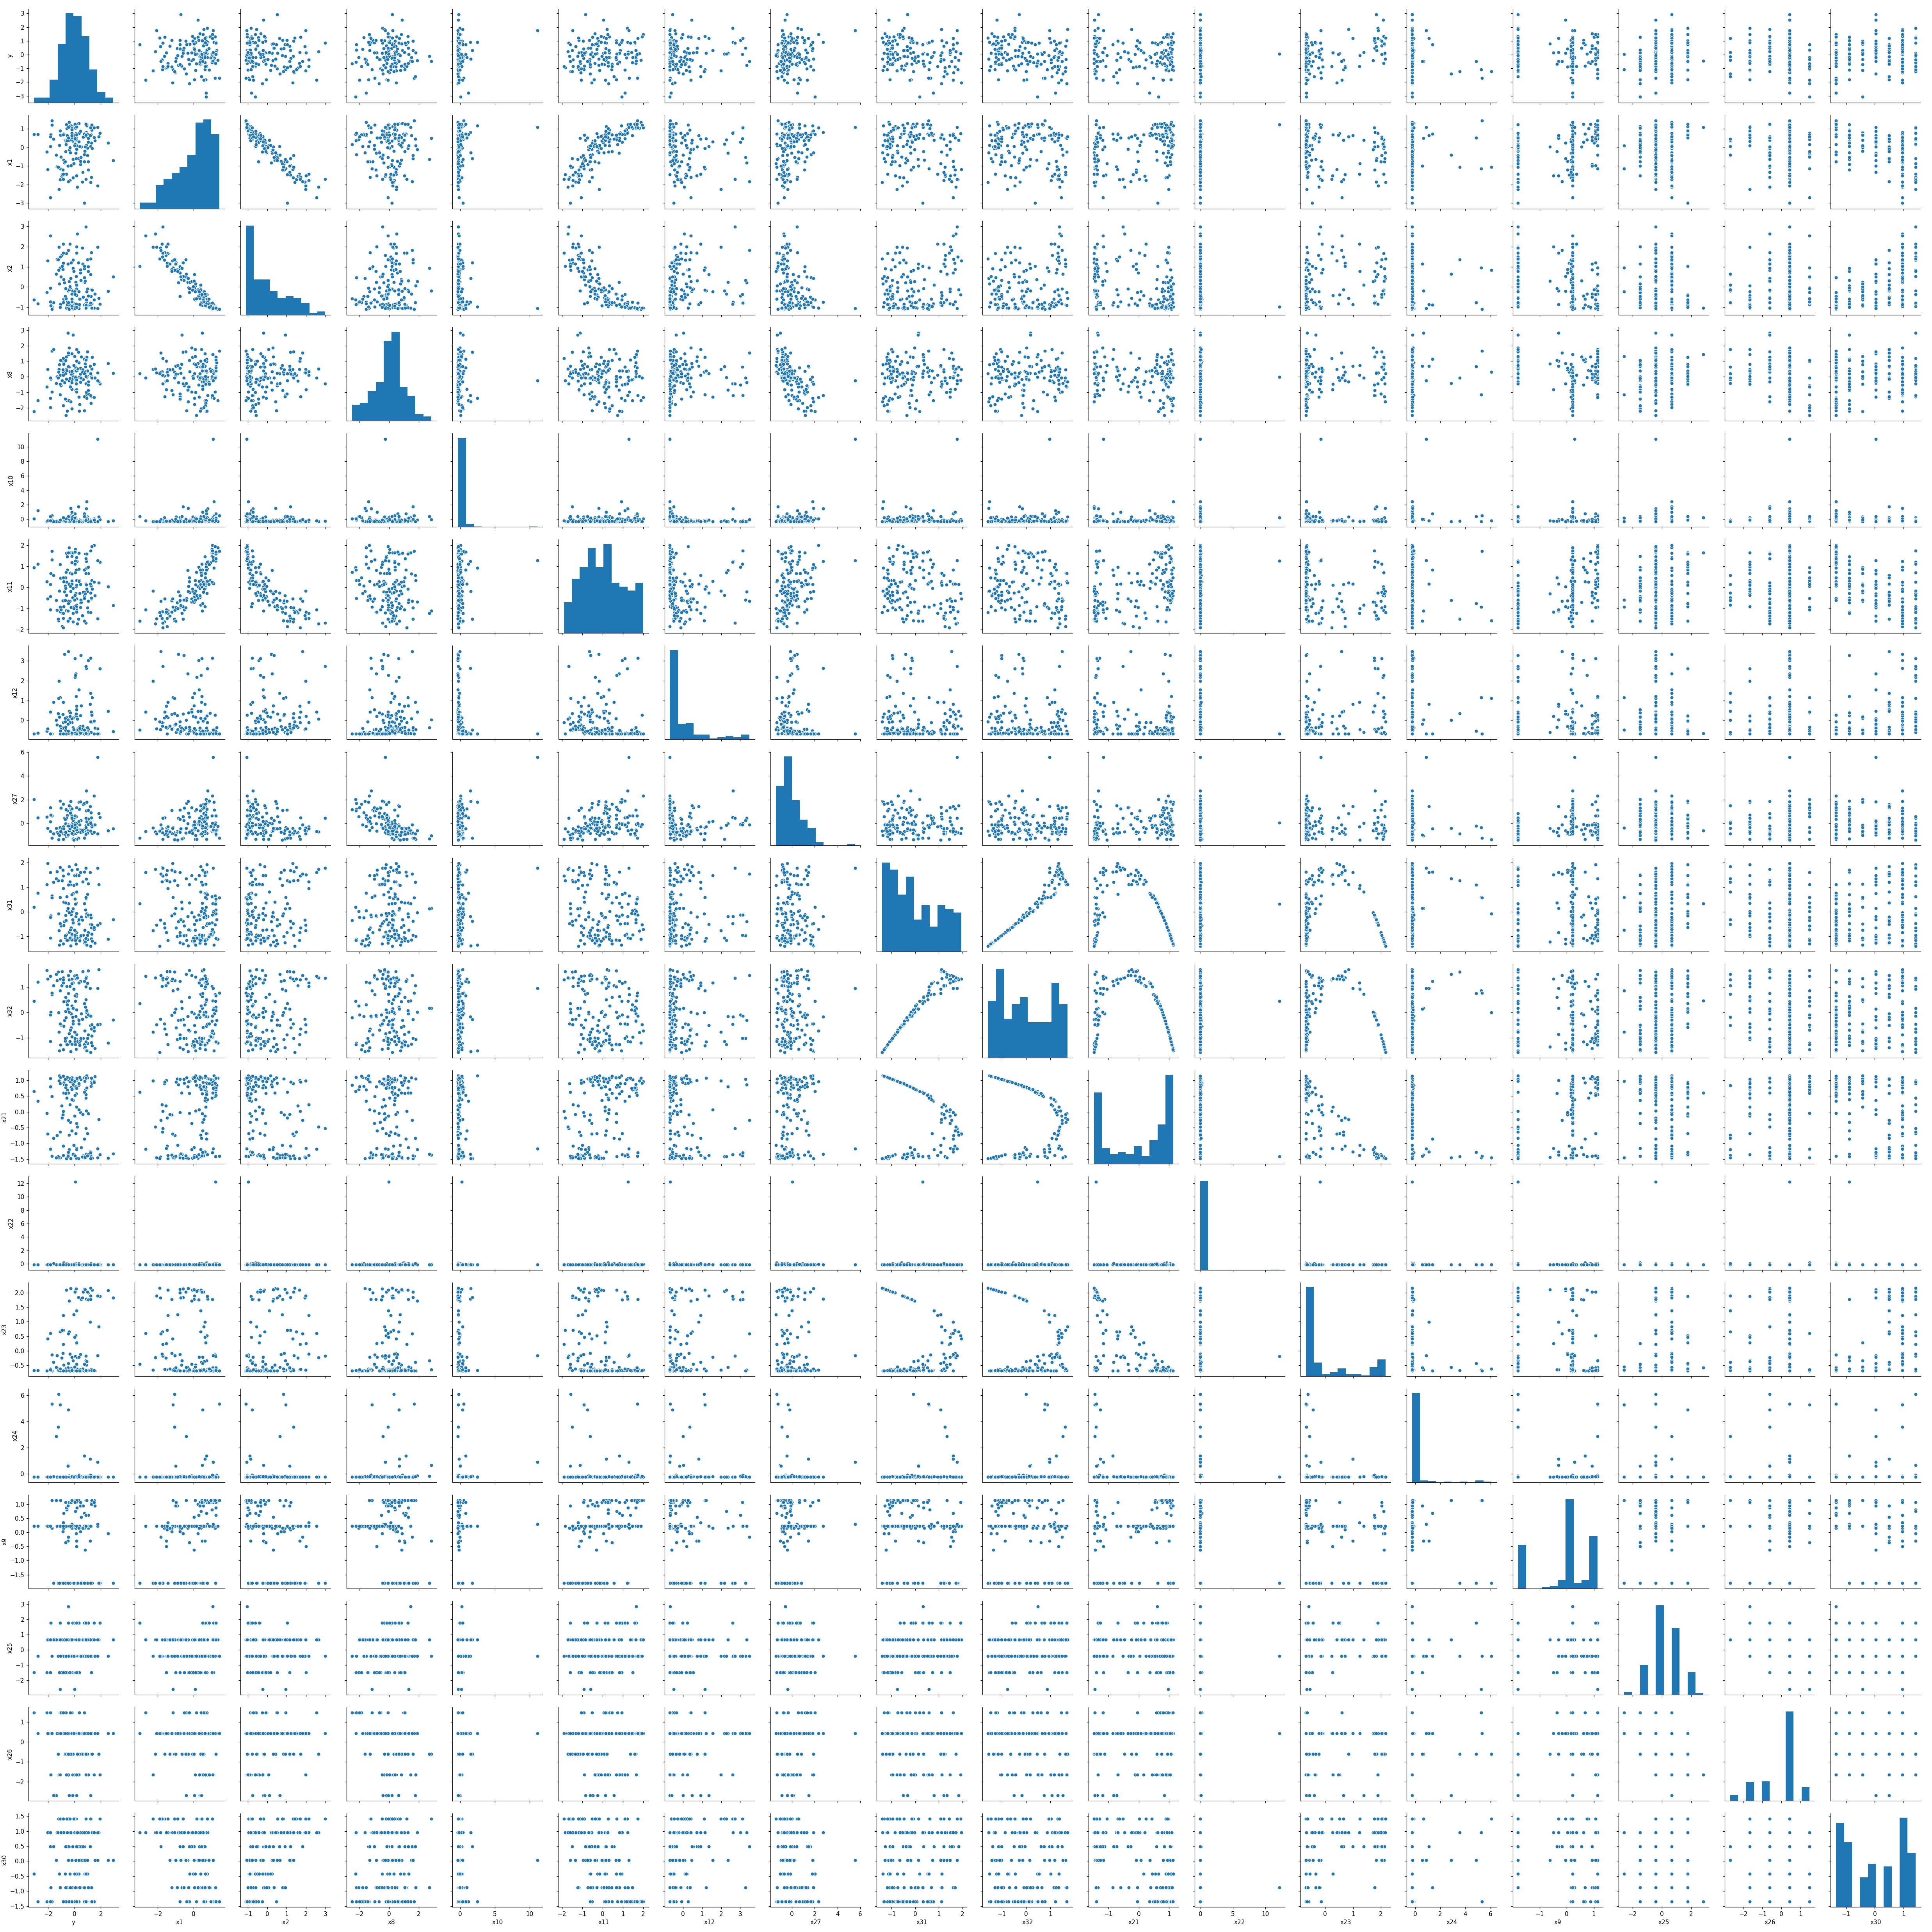

In [21]:
sns.pairplot(DatosC_sc.loc[:,scaled_df.dtypes == 'float64'])

X1 tiene una correlación alta con X2 (inv), X11

In [13]:
DatosC_sc.corr(method ='spearman') 

y        x1        x2        x8       x10       x11       x12  \
y    1.000000  0.132923 -0.098480  0.000471  0.002701  0.096002  0.068912   
x1   0.132923  1.000000 -0.949281 -0.048308  0.307029  0.870982 -0.450022   
x2  -0.098480 -0.949281  1.000000  0.090754 -0.296829 -0.888734  0.496448   
x8   0.000471 -0.048308  0.090754  1.000000  0.016913 -0.132431  0.281548   
x10  0.002701  0.307029 -0.296829  0.016913  1.000000  0.177350 -0.517488   
x11  0.096002  0.870982 -0.888734 -0.132431  0.177350  1.000000 -0.351741   
x12  0.068912 -0.450022  0.496448  0.281548 -0.517488 -0.351741  1.000000   
x27  0.117451  0.312071 -0.349072 -0.695162  0.156425  0.359595 -0.329602   
x31 -0.223969 -0.110000  0.091511  0.070088  0.023622 -0.151472  0.036198   
x32 -0.236905 -0.105608  0.077832  0.033070  0.018068 -0.140236 -0.007121   
x21 -0.066947  0.304835 -0.339166 -0.157150  0.049695  0.328088 -0.258612   
x22  0.124756  0.582862 -0.557130  0.125306 -0.023916  0.542688 -0.225405   
x23  0.185256 -0.332338  0.389399  0.127427 -0.080712 -0.343070  0.278746   
x24 -0.027366  0.198248 -0.175662  0.221486 -0.019326  0.137462  0.146532   
x9   0.019747  0.535507 -0.496395 -0.089798  0.035619  0.514084 -0.236836   
x25  0.219710  0.061774 -0.057536  0.110980  0.165686  0.034463 -0.122289   
x26 -0.174941 -0.101704  0.062558 -0.322809 -0.102556  0.008459 -0.001252   
x30  0.017991 -0.608639  0.634945  0.105325 -0.201939 -0.596438  0.496669   

          x27       x31       x32       x21       x22       x23       x24  \
y    0.117451 -0.223969 -0.236905 -0.066947  0.124756  0.185256 -0.027366   
x1   0.312071 -0.110000 -0.105608  0.304835  0.582862 -0.332338  0.198248   
x2  -0.349072  0.091511  0.077832 -0.339166 -0.557130  0.389399 -0.175662   
x8  -0.695162  0.070088  0.033070 -0.157150  0.125306  0.127427  0.221486   
x10  0.156425  0.023622  0.018068  0.049695 -0.023916 -0.080712 -0.019326   
x11  0.359595 -0.151472 -0.140236  0.328088  0.542688 -0.343070  0.137462   
x12 -0.329602  0.036198 -0.007121 -0.258612 -0.225405  0.278746  0.146532   
x27  1.000000 -0.050255 -0.030997  0.176861  0.108498 -0.094216 -0.074937   
x31 -0.050255  1.000000  0.979217 -0.396626 -0.022026  0.217818  0.097170   
x32 -0.030997  0.979217  1.000000 -0.381507 -0.002146  0.170392  0.071891   
x21  0.176861 -0.396626 -0.381507  1.000000  0.327247 -0.774716 -0.121975   
x22  0.108498 -0.022026 -0.002146  0.327247  1.000000 -0.329331  0.072857   
x23 -0.094216  0.217818  0.170392 -0.774716 -0.329331  1.000000 -0.099140   
x24 -0.074937  0.097170  0.071891 -0.121975  0.072857 -0.099140  1.000000   
x9   0.178403 -0.085663 -0.076454  0.314066  0.370799 -0.365009  0.172991   
x25 -0.085009  0.241004  0.223115 -0.186486  0.095599  0.278681 -0.147738   
x26  0.164498 -0.133456 -0.139294  0.187119 -0.247821 -0.216130 -0.072711   
x30 -0.222753  0.199392  0.162834 -0.512548 -0.473622  0.573549 -0.162173   

           x9       x25       x26       x30  
y    0.019747  0.219710 -0.174941  0.017991  
x1   0.535507  0.061774 -0.101704 -0.608639  
x2  -0.496395 -0.057536  0.062558  0.634945  
x8  -0.089798  0.110980 -0.322809  0.105325  
x10  0.035619  0.165686 -0.102556 -0.201939  
x11  0.514084  0.034463  0.008459 -0.596438  
x12 -0.236836 -0.122289 -0.001252  0.496669  
x27  0.178403 -0.085009  0.164498 -0.222753  
x31 -0.085663  0.241004 -0.133456  0.199392  
x32 -0.076454  0.223115 -0.139294  0.162834  
x21  0.314066 -0.186486  0.187119 -0.512548  
x22  0.370799  0.095599 -0.247821 -0.473622  
x23 -0.365009  0.278681 -0.216130  0.573549  
x24  0.172991 -0.147738 -0.072711 -0.162173  
x9   1.000000 -0.045938  0.040585 -0.450820  
x25 -0.045938  1.000000 -0.643028  0.094741  
x26  0.040585 -0.643028  1.000000 -0.149146  
x30 -0.450820  0.094741 -0.149146  1.000000

In [14]:
import seaborn as sns
corr = scaled_df.loc[:,scaled_df.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 33, as_cmap=True))

<IPython.core.display.Javascript object>


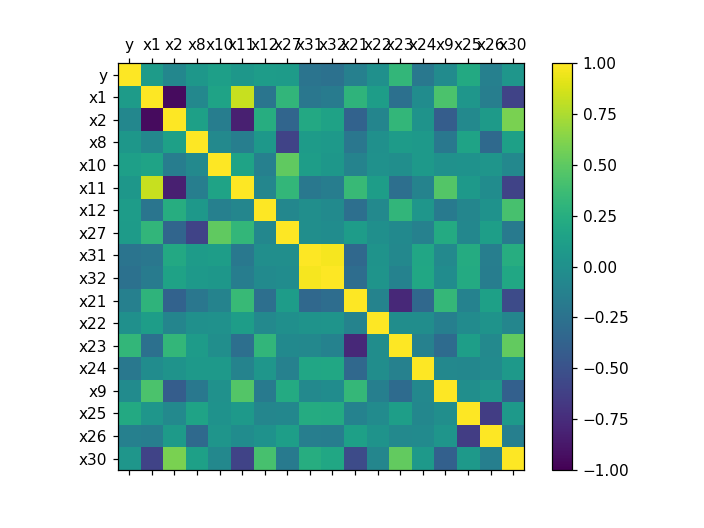

In [22]:
correlations = DatosC_sc.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,18,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

<IPython.core.display.Javascript object>


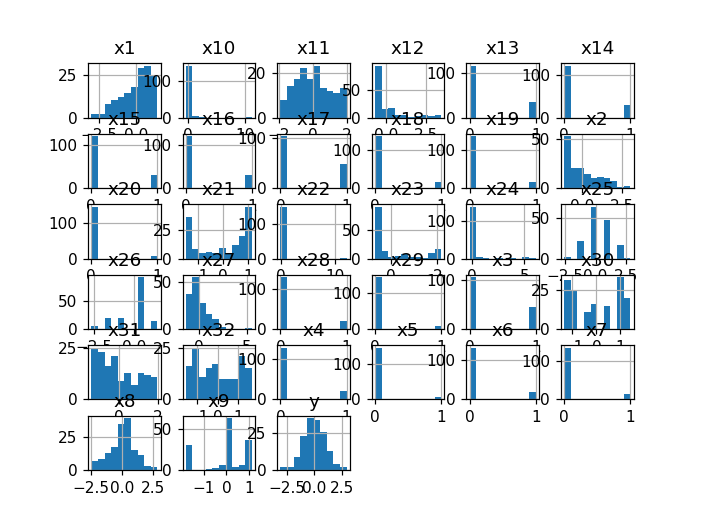

In [23]:
scaled_df.hist()
plt.show()

<IPython.core.display.Javascript object>


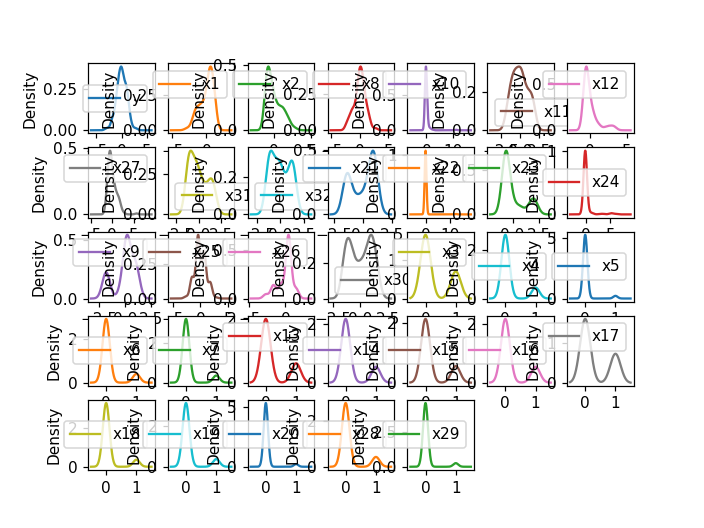

In [24]:
scaled_df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [25]:
X = scaled_df.drop('y', axis=1)
y = scaled_df['y'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [32]:
import statsmodels.api as sm

df = scaled_df.dropna(axis=0,how='any')


Pvalue=[]

for Var in np.arange(df.shape[1]-4):
    y=df[datos.columns[0]]
    x=df.iloc[:,[Var + 1]] # o se escribe x=datos.iloc[:,1:3] 
    x=sm.add_constant(x)
    model=sm.OLS(y, x)
    results = model.fit()
    Pvalue=np.append(Pvalue, results.pvalues[1])

for Var in np.arange(3):
    dummy = pd.get_dummies(df[df.columns[Var-16]], drop_first=True)
    x=sm.add_constant(dummy)
    model=sm.OLS(y, x)
    results = model.fit()
    Pvalue=np.append(Pvalue, np.min(results.pvalues[1:x.shape[1]]))

Result={'Nombre':df.columns[1:37],'Pvalue':Pvalue}
df6=pd.DataFrame(Result)

df6.sort_values(by=['Pvalue'])

Nombre    Pvalue
11    x23  0.000053
8     x32  0.001740
7     x31  0.004206
14    x25  0.009085
12    x24  0.013127
31    x29  0.015120
22    x13  0.028485
9     x21  0.121177
15    x26  0.121937
3     x10  0.125144
34    XC3  0.158571
21     x7  0.158571
17     x3  0.168611
27    x18  0.178595
5     x12  0.213175
0      x1  0.218393
24    x15  0.220186
6     x27  0.248862
1      x2  0.369549
29    x20  0.392107
33    XC2  0.409381
20     x6  0.409381
26    x17  0.418234
25    x16  0.427225
4     x11  0.461994
23    x14  0.472629
2      x8  0.474447
16    x30  0.514691
19     x5  0.554319
32    XC1  0.554319
13     x9  0.661207
30    x28  0.702047
28    x19  0.810488
18     x4  0.933929
10    x22  0.961099

In [34]:
# prepare for modeling
X = datos.drop(['y','XC1','XC2','XC3'], axis=1)
y = datos['y'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
X_train_df = X_train
y_train = y_train
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_df)
num_feats=len(datos.columns)-1#len(X) X.shape[0]
num_feats

35

In [35]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const    0.463262
x1       0.286643
x2       0.968103
x8       0.608142
x10      0.039634
x11      0.225426
x12      0.624031
x27      0.636458
x31      0.363783
x32      0.773457
x21      0.721546
x22      0.902294
x23      0.235986
x24      0.404244
x9       0.800337
x25      0.017121
x26      0.399697
x30      0.788540
x3       0.525831
x4       0.859692
x5       0.509040
x6       0.120779
x7       0.488348
x13      0.005723
x14      0.933126
x15      0.447770
x16      0.596250
x17      0.832678
x18      0.652460
x19      0.301233
x20      0.043815
x28      0.726686
x29      0.685806
dtype: float64

In [36]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['x10', 'x31', 'x23', 'x25', 'x13', 'x20']


In [39]:
#no of features
nof_list=np.arange(1,32)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 0
Score with 0 features: 0.000000


In [40]:
nof=nof+1
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, nof)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['x24'], dtype='object')


In [43]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other "
      +  str(sum(coef == 0)) + " variables")


Best alpha using built-in LassoCV: 0.089733
Best score using built-in LassoCV: 0.263018
Lasso picked 13 variables and eliminated the other 19 variables


C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [44]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Text(0.5, 1.0, 'Feature importance using Lasso Model')

https://www.kaggle.com/guoyiyang92/simple-feature-selection-categorical-continuous

In [45]:
# pandas for data loading, manipulation etc.
import pandas as pd


# numeric functions
import xgboost
import numpy as np
import collections
import operator
from scipy import stats
from math import ceil

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# modelling
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,Lars,LassoLars,SGDRegressor
from sklearn.linear_model import RidgeCV, LassoCV,BayesianRidge
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,train_test_split
from sklearn.metrics import make_scorer,r2_score
from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor




In [46]:
# Get column names first tomado de 4
names = datos.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
DatosC = datos.iloc[:,1:18].copy() 
DatosD =  datos.iloc[:,18:].copy() 

DatosC_sc = scaler.fit_transform(DatosC)
scaled_df = pd.DataFrame(DatosC_sc, columns=names[1:18])
#frames = [scaled_df, DatosD]

scaled_df = pd.concat([scaled_df, DatosD], axis=1, sort=False)

y = datos['y'].values
#DatosC_sc
#scaled_df

In [48]:
alpha = [0.2, 0.25, 0.275, 0.3, 0.325, 0.35] #len(DatosC) DatosC

In [49]:
DatosC_sc = pd.DataFrame(DatosC_sc, columns=names[1:18])
lasso_feature_coef_df = pd.DataFrame(np.zeros((len(DatosC_sc.columns), len(alpha))), index=DatosC_sc.columns, columns=alpha)

In [50]:
#lasso_feature_coef_df = []
for a in alpha: 
    lasso = Lasso(a)
    lasso.fit(DatosC_sc, y)    
    #lasso_feature_coef_df.append (lasso.coef_)
    lasso_feature_coef_df[a] = lasso.coef_

In [51]:
lasso_top10_features = lasso_feature_coef_df.reindex(index=lasso_feature_coef_df[0.30].abs()\
.sort_values(ascending = False).index).head(10)

lasso_top10_features

0.200     0.250     0.275     0.300     0.325     0.350
x23  0.424889  0.378468  0.361895  0.345263  0.328570  0.311878
x32 -0.333207 -0.288984 -0.261775 -0.235114 -0.209021 -0.182933
x25  0.266487  0.218273  0.191266  0.164034  0.136563  0.109094
x24 -0.105305 -0.070300 -0.052276 -0.035290 -0.019397 -0.003503
x27  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
x2  -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000
x8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
x10  0.089739  0.041836  0.014178  0.000000  0.000000  0.000000
x11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
x12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

In [52]:
selected_features_lasso = lasso_top10_features.index[:4].tolist()
print('Features of significant coefficient include: \n', selected_features_lasso)

Features of significant coefficient include: 
 ['x23', 'x32', 'x25', 'x24']


Random Forest Regressor

In [53]:
rf = RandomForestRegressor(n_estimators=200, criterion='mse', max_features='sqrt')
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
# Store the top 10 most important features based off rf regressor
rf_feature_importance_df = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance_Value'])
rf_top_features = rf_feature_importance_df.sort_values(by = ['Importance_Value'], ascending=False).head(32)

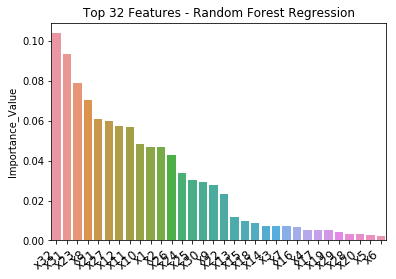

In [55]:
ax0 = sns.barplot(x = rf_top_features.index, y = 'Importance_Value', data=rf_top_features)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize = 12, rotation=40, ha="right")
plt.title('Top 32 Features - Random Forest Regression')
plt.show()

In [57]:
selected_features_rf = rf_top_features[rf_top_features.Importance_Value >= 0.005].index.tolist()
print('Features of high importance value include: \n', selected_features_rf)

Features of high importance value include: 
 ['x32', 'x31', 'x23', 'x8', 'x21', 'x27', 'x12', 'x11', 'x10', 'x1', 'x2', 'x26', 'x24', 'x25', 'x30', 'x9', 'x22', 'x13', 'x15', 'x18', 'x14', 'x3', 'x7', 'x16', 'x4', 'x17', 'x19']


hasta la x25 son continuas desde la X29 son dicótomas

https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions

In [66]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 35 columns):
x1     150 non-null float64
x2     150 non-null float64
x8     150 non-null float64
x10    150 non-null float64
x11    150 non-null float64
x12    150 non-null float64
x27    150 non-null float64
x31    150 non-null float64
x32    150 non-null float64
x21    150 non-null float64
x22    150 non-null float64
x23    150 non-null float64
x24    150 non-null float64
x9     150 non-null float64
x25    150 non-null float64
x26    150 non-null float64
x30    150 non-null float64
x3     150 non-null int64
x4     150 non-null int64
x5     150 non-null int64
x6     150 non-null int64
x7     150 non-null int64
x13    150 non-null int64
x14    150 non-null int64
x15    150 non-null int64
x16    150 non-null int64
x17    150 non-null int64
x18    150 non-null int64
x19    150 non-null int64
x20    150 non-null int64
x28    150 non-null int64
x29    150 non-null int64
XC1    150 non-null object
XC

In [82]:
# extract names of numeric columns
dtypes = datos.dtypes
cols_numeric = dtypes[dtypes != object].index.tolist() # object o 'category'

# choose any numeric column with less than 13 values to be
# "discrete". 13 chosen to include months of the year.
# other columns "continuous"
col_nunique = dict()

for col in cols_numeric:
    col_nunique[col] = datos[col].nunique()
    
col_nunique = pd.Series(col_nunique)

cols_discrete = col_nunique[col_nunique<13].index.tolist()
cols_continuous = col_nunique[col_nunique>=13].index.tolist()

print(len(cols_numeric),'numeric columns, of which',
      len(cols_continuous),'are continuous and',
      len(cols_discrete),'are discrete.')


33 numeric columns, of which 15 are continuous and 18 are discrete.


In [83]:
# extract names of categorical columns
cols_categ = dtypes[~dtypes.index.isin(cols_numeric)].index.tolist()

for col in cols_categ:
    scaled_df[col] = datos[col].astype(object) #category
    
print(len(cols_categ),'categorical columns.')

3 categorical columns.


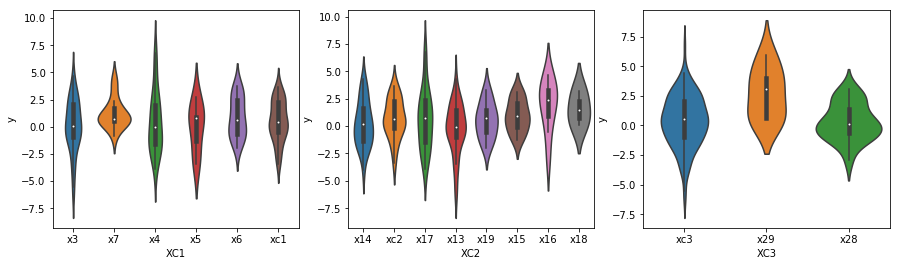

In [84]:
# plot categorical variables
import math
fcols = 3
frows = math.ceil(len(cols_categ)/fcols)
plt.figure(figsize=(15,4*frows))

for i,col in enumerate(cols_categ):
    plt.subplot(frows,fcols,i+1)
    sns.violinplot(datos[col],datos['y'])

In [85]:
# anova test to check significance of variation in column 'group' vs. column 'value' 
def anova(group,value):
    # select columns of interest, and remove any rows with nan values
    data = datos[[group,value]]
    data = data[~(data[group].isnull() | data[value].isnull())]
    
    # stats across all data
    tot_groups = data[group].nunique() # no. of groups
    len_data = len(data) # total sample size of houses (all groups)
    mean_data = data[value].mean() # mean across all groups
    df_betwn = tot_groups - 1 # degrees of freedom betwn grps
    df_within = len_data - tot_groups # degrees of freedom within grps
    
    # per group stats
    n_in_group = data.groupby(group)[value].count() # no. houses in group
    mean_group = data.groupby(group)[value].mean() # mean value in this group
    
    # between-group variability
    betwn_var = n_in_group*((mean_group - mean_data)**2)
    betwn_var = float(betwn_var.sum())/df_betwn
    
    # within-group variability
    within_var = 0
    for grp in data[group].unique():
        samples = data.loc[data[group]==grp, value]
        within_var += ((samples-mean_group[grp])**2).sum()
        
    within_var = float(within_var)/df_within
    
    #F-test statistic
    F = betwn_var/within_var
    
    # p-value
    p = stats.f.sf(F, df_betwn, df_within)
    
    return p      

In [86]:
# check significance of categorical variables on SalePrice
from scipy import stats
p_col = dict()

for col in cols_categ:
    p_col[col] = anova(col,'y')
    
pd.Series(p_col).sort_values()

XC3    0.020787
XC2    0.172349
XC1    0.540941
dtype: float64

Solo el XC3 es menor a 0.05

In [87]:
p_col = dict()

for col in cols_discrete:
    p_col[col] = anova(col,'y')
    
pd.Series(p_col).sort_values()

x26    0.002669
x29    0.015120
x13    0.028485
x25    0.045000
x7     0.158571
x3     0.168611
x18    0.178595
x15    0.220186
x30    0.321480
x20    0.392107
x6     0.409381
x17    0.418234
x16    0.427225
x14    0.472629
x5     0.554319
x28    0.702047
x19    0.810488
x4     0.933929
dtype: float64

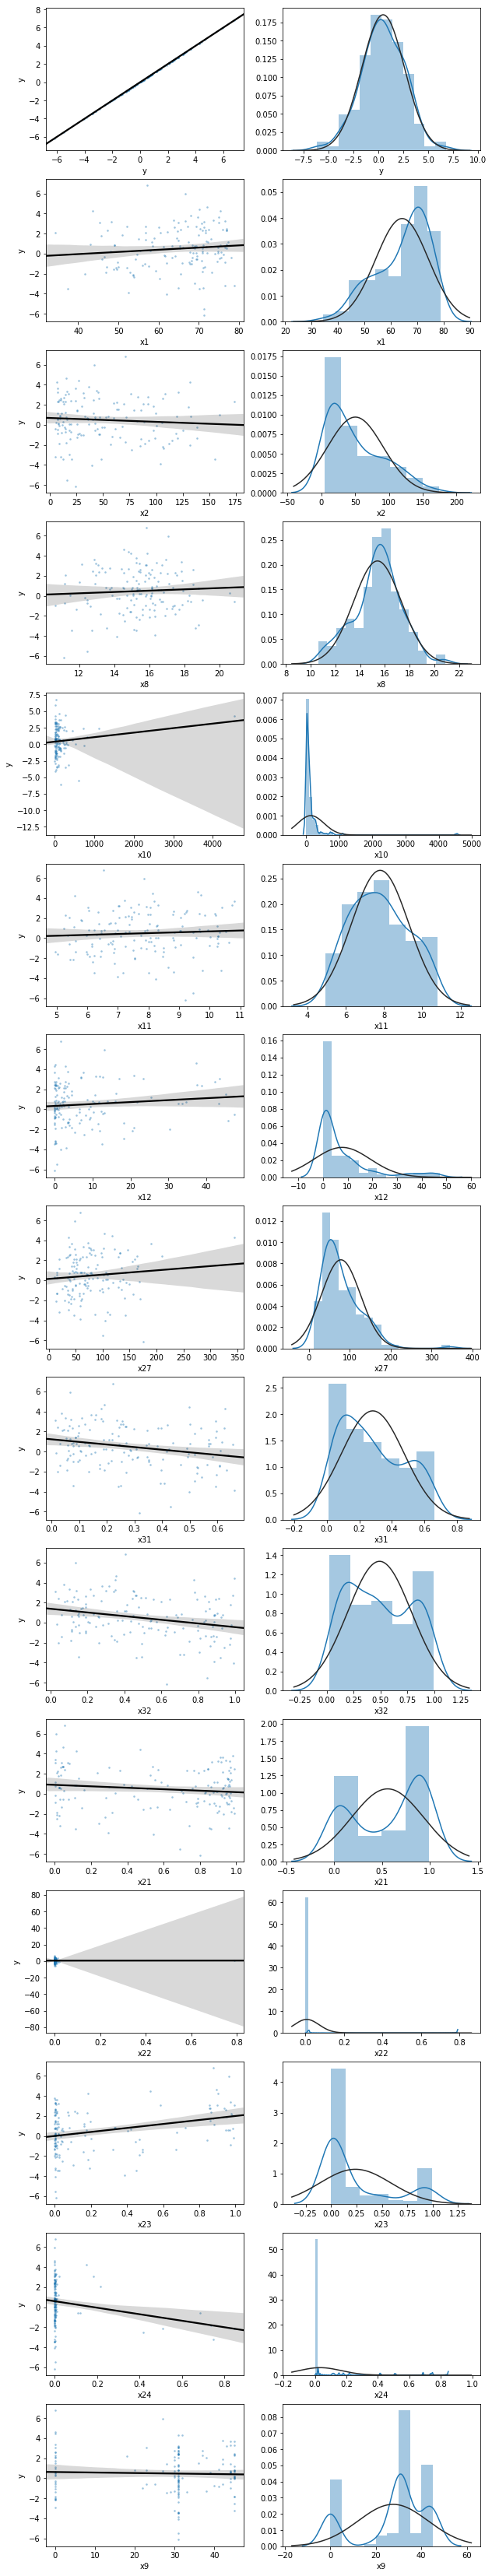

In [90]:
# figure parameters
fcols = 2
frows = len(cols_continuous)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in cols_continuous:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='y', data=datos, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('y')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(datos[col].dropna() , fit=stats.norm)
    plt.xlabel(col)

In [91]:
cols_continuous

['y',
 'x1',
 'x2',
 'x8',
 'x10',
 'x11',
 'x12',
 'x27',
 'x31',
 'x32',
 'x21',
 'x22',
 'x23',
 'x24',
 'x9']

In [92]:
from sklearn.preprocessing import minmax_scale
# normalise numeric columns
scale_cols = [col for col in cols_numeric if col!='y']

datos[scale_cols] = datos[scale_cols].apply(minmax_scale,axis=0)

datos[scale_cols].describe()

x1          x2          x8         x10         x11         x12  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     0.674544    0.270649    0.467763    0.030386    0.487419    0.163757   
std      0.225244    0.244223    0.188596    0.087399    0.257041    0.241246   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.507616    0.059876    0.380125    0.003483    0.278659    0.005488   
50%      0.751628    0.209344    0.473620    0.011539    0.478062    0.057167   
75%      0.836012    0.454169    0.583326    0.026860    0.689214    0.217896   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              x27         x31         x32         x21     ...             x13  \
count  150.000000  150.000000  150.000000  150.000000     ...      150.000000   
mean     0.201971    0.417333    0.480861    0.563655     ...        0.233333   
std      0.143801    0.297793    0.307576    0.383025     ...        0.424370   
min      0.000000    0.000000    0.000000    0.000000     ...        0.000000   
25%      0.101422    0.136594    0.176098    0.110280     ...        0.000000   
50%      0.165746    0.362784    0.450079    0.721116     ...        0.000000   
75%      0.274561    0.653738    0.796174    0.923911     ...        0.000000   
max      1.000000    1.000000    1.000000    1.000000     ...        1.000000   

             x14         x15        x16         x17         x18         x19  \
count  150.00000  150.000000  150.00000  150.000000  150.000000  150.000000   
mean     0.20000    0.206667    0.20000    0.313333    0.100000    0.106667   
std      0.40134    0.406271    0.40134    0.465403    0.301005    0.309723   
min      0.00000    0.000000    0.00000    0.000000    0.000000    0.000000   
25%      0.00000    0.000000    0.00000    0.000000    0.000000    0.000000   
50%      0.00000    0.000000    0.00000    0.000000    0.000000    0.000000   
75%      0.00000    0.000000    0.00000    1.000000    0.000000    0.000000   
max      1.00000    1.000000    1.00000    1.000000    1.000000    1.000000   

              x20         x28         x29  
count  150.000000  150.000000  150.000000  
mean     0.040000    0.133333    0.053333  
std      0.196616    0.341073    0.225450  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 32 columns]

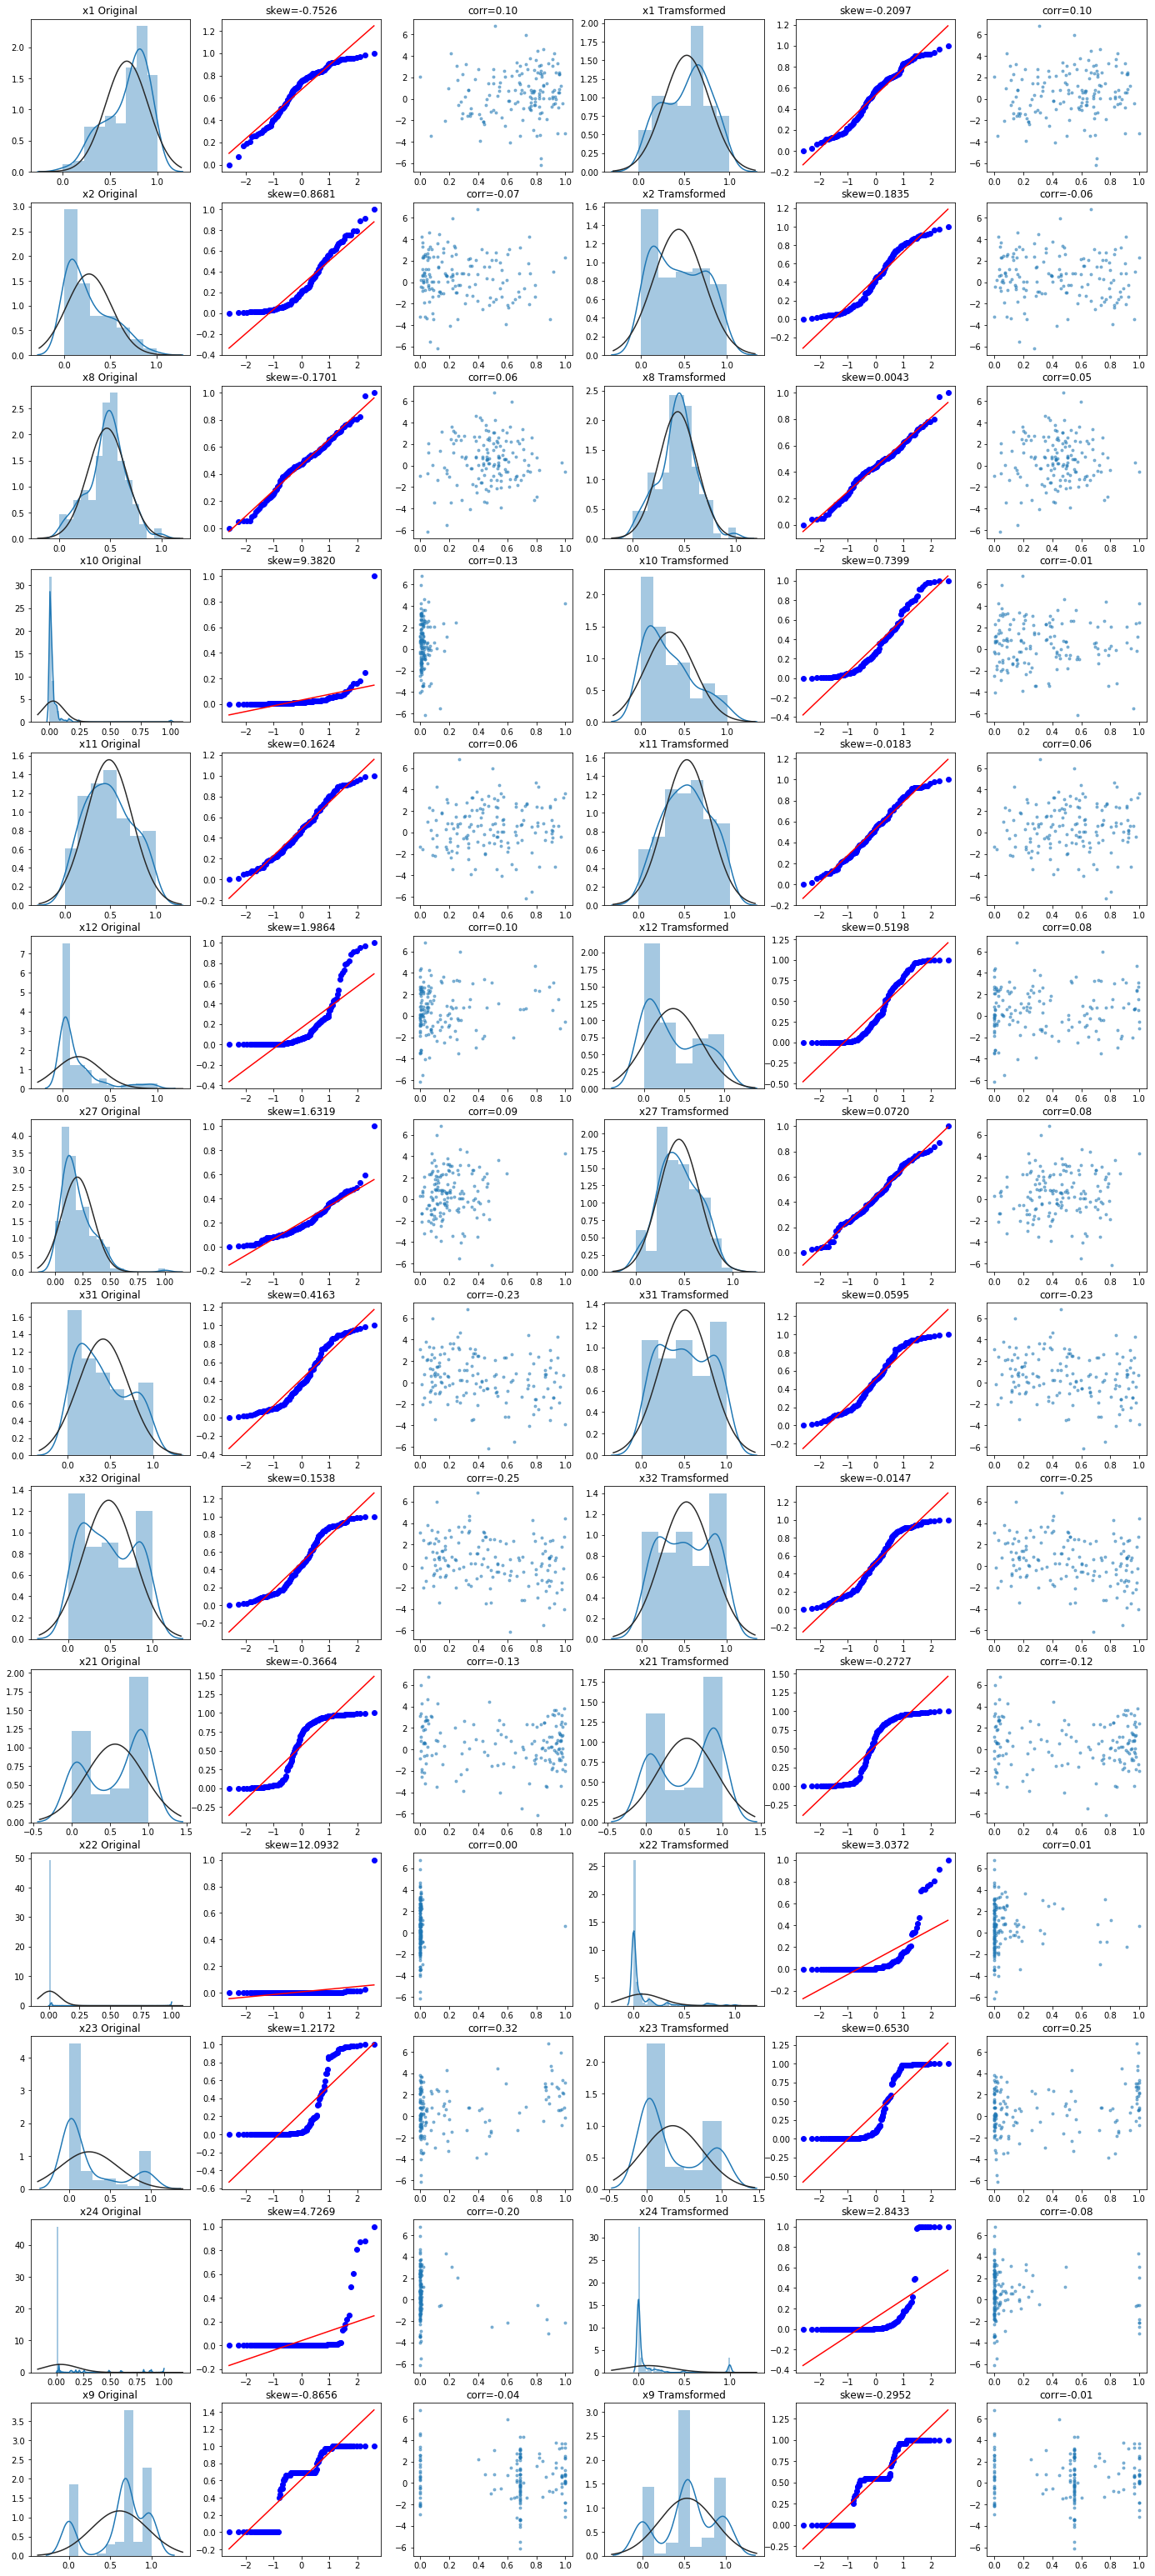

In [93]:
#Check effect of Box-Cox transforms on distributions of continuous variables
import warnings
warnings.filterwarnings("ignore")
fcols = 6
frows = len(cols_continuous)-1
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_continuous:
    if var!='y':
        dat = datos[[var, 'y']].dropna()
        
        i+=1
        plt.subplot(frows,fcols,i)
        sns.distplot(dat[var] , fit=stats.norm);
        plt.title(var+' Original')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(dat[var], plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(dat[var], dat['y'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['y'])[0][1]))
 
        i+=1
        plt.subplot(frows,fcols,i)
        trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
        trans_var = minmax_scale(trans_var)      
        sns.distplot(trans_var , fit=stats.norm);
        plt.title(var+' Tramsformed')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(trans_var, plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(trans_var, dat['y'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['y'])[0][1]))

Escoger variables

In [94]:
iteraciones=12000
modelos={
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet':ElasticNet(),
    'Lars':Lars(),
    'LassoLars':LassoLars(),
    'SGD':SGDRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'RamdomForest':RandomForestRegressor(),
    'BayeRidge':BayesianRidge()
}
Var_selec={
    'Ridge': [],
    'Lasso': [],
    'ElasticNet':[],
    'Lars':[],
    'LassoLars':[],
    'SGD':[],
    'DecisionTree':[],
    'RamdomForest':[],
    'BayeRidge':[]
}
Frec=Var_selec
Frec_acu=[]

In [95]:
X=datos.drop(['XC1','XC2','XC3'], axis=1)

In [96]:
for llave,modelo in modelos.items():
    for a in range(iteraciones):
        selector=SelectFromModel(modelo)
        selector.fit(X,y)
        soporte=selector.get_support()
        variable=X.loc[:,soporte].columns.tolist()
        Var_selec[llave]+=variable
    Frec_acu=Frec_acu+Var_selec[llave]
variables=sorted(collections.Counter(Frec_acu).items(), key=operator.itemgetter(1), reverse=True)
sort_Var=[x[0]for x in variables]
sort_Val=[x[1]for x in variables]

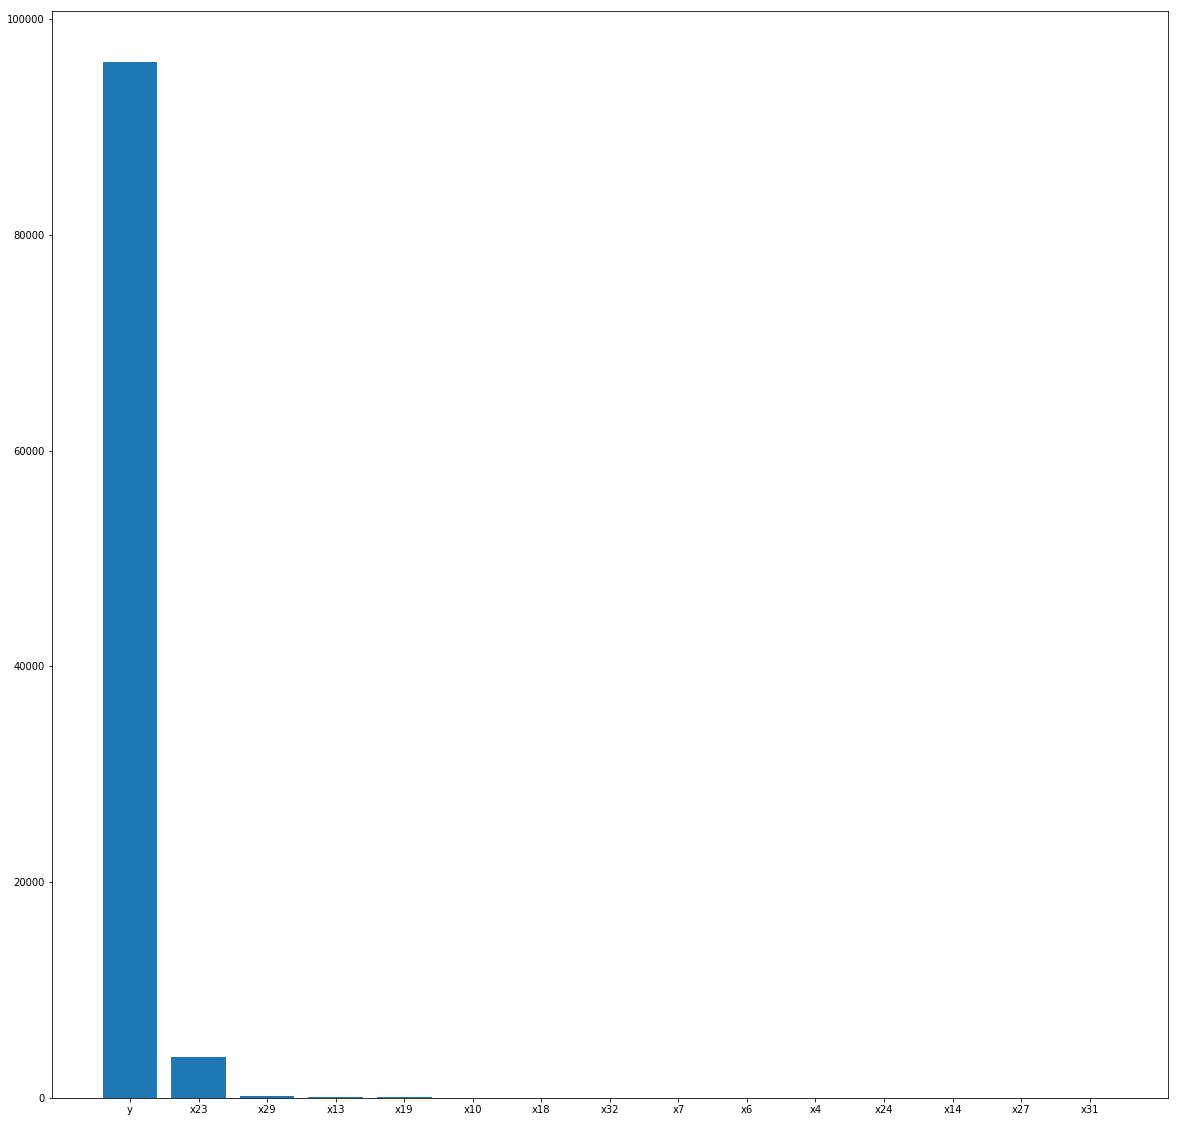

In [97]:
plt.figure(figsize=[20,20])
plt.bar(sort_Var,sort_Val)
plt.show()